# Binary Classification using an SVM
We shall classify breast cancer as benign or malignant using a SVM built from scratch.  
The dataset can be found [here](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data).

In [1268]:
# IMPORTS:

%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

# We'll use sklearn functions mainly as helper functions:
from sklearn.utils import shuffle # For shuffling the data
from sklearn.preprocessing import StandardScaler as scale # For feature normalization
from sklearn.model_selection import train_test_split as tts # For creating separate train/test sets
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score # For evaluating our data

# Data and Pre-processing:

In [1269]:
# DATA:
def load_data():
    df = pd.read_csv('data.csv')
    # 'id' is a useless feature, and a null column was also added at the last while reading the data.
    # We need to remove both of these.
    df.drop(df.columns[[-1, 0]], axis=1, inplace=True)
    
    # We also need to encode the data categorically.
    diagnosis_map = {'M':1, 'B':-1}
    df['diagnosis'] = df['diagnosis'].map(diagnosis_map)
    return df

In [1270]:
# PRE-PROCESSING THE DATA:
def preprocess_data(df):
    X = df.drop(['diagnosis'], axis=1).to_numpy()
    y = df['diagnosis'].to_numpy()
    # Shuffling the data:
    X, y = shuffle(X, y)
    # Feature Scaling: Mean Normalization
    X = scale().fit_transform(X)
    return X, y

# Cost function and it's Gradient
Mathematical details are covered in the theory part. 

In [1271]:
def cost(X, y, W, b, C):
    # We use the Hinge Loss function:
    hinge_loss = 0
    
    # Not vectorized: (Included for completeness :p)
    #for i in range(y.shape[0]):
    #    loss = 1 - y[i]*(np.dot(W.T, X[i]) + b)
    #    loss = max(0, loss)
    #    hinge_loss += loss
    
    # Vectorized:
    losses = 1 - y*(np.dot(X, W) + b)
    losses[losses < 0] = 0 # Like max(0, loss) in the unvectorized version
    hinge_loss = np.sum(losses)
    
    # "Regularized" cost:
    cost = (1/2)*np.dot(W, W) + C*hinge_loss
    return cost

In [1272]:
def gradient(X, y, W, b, C):
    dw = np.zeros(W.shape)
    db = 0
    distances = 1 - y*(np.dot(X, W) + b) # Vectorized
    # TODO: Vectorize the below for-loop
    for i,d in enumerate(distances):
        if max(0, d) == 0:
            dw_i = W
            db_i = 0
        else:
            dw_i = W - (C*y[i]*X[i])
            db_i = -C*y[i]
        dw += dw_i
        db += db_i 
    return dw, db

# Batch Gradient Descent:

In [1273]:
# GRADIENT DESCENT PARAMETERS:
alpha = 0.000001
N_ITERS = 800

In [1274]:
# IMPLEMENTING BATCH-GRADIENT-DESCENT
costList = []
def bgd(X, y, W, b, C):
    for _ in  range(N_ITERS):
        dw, db = gradient(X, y, W, b, C)
        W = W - alpha*dw
        b = b - alpha*db
        costList.append(cost(X, y, W, b, C))
    return W, b

In [1275]:
# Function to predict the classes in a set of data points:
def predict(X, W, b):
    return (np.dot(X, W) + b) # Vectorized

# Training and Testing:

In [1276]:
# MAIN:
df = load_data()
X, y = preprocess_data(df)
# SPLITTING THE DATA:
X_train, X_test, y_train, y_test = tts(X, y, random_state=0)

In [1277]:
# Initial Weights and Biases:
W_0 = np.zeros(X_train.shape[1])
b_0 = 0
C = 6
# Training:
W, b = bgd(X_train, y_train, W_0, b_0, C)

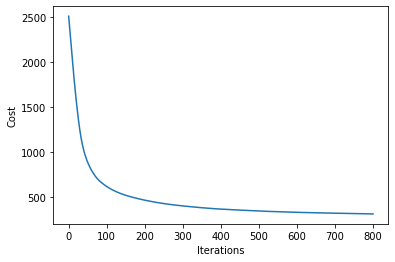

In [1278]:
# Cost variation visualization:
plt.plot(np.linspace(0, N_ITERS, N_ITERS), costList)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.show()

Don't be surprised by the high value of the cost.   
Unlike logistic regression, we have not divided the cost by the size while computing the cost.

In [1279]:
y_pred = np.sign(predict(X_test, W, b))

In [1280]:
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
print("Accuracy Score: ", accuracy_score(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))

Confusion Matrix: 
 [[85  0]
 [ 2 56]]
Accuracy Score:  0.986013986013986
F1 Score:  0.9824561403508771
